In [2]:
import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
sns.set()  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [3]:
df=pd.read_csv("employmentfortune.csv")
df

,employment_change_rate,company,location,industry,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year,sector
0,2.025,AES,VA,Utilities: Gas and Electric,162.0,4720.0,10189,8000,303,0,0,2020,Energy
1,3.529,AES,VA,Utilities: Gas and Electric,288.0,4567.0,9660,8162,46,0,3,2021,Energy
2,7.692,AES,VA,Utilities: Gas and Electric,650.0,4504.0,11141,8450,409,0,0,2022,Energy
3,0.000,AES,VA,Utilities: Gas and Electric,NaN,NaN,12617,9100,546,0,-1,2023,Energy
4,-6.522,Alcoa,PA,Metals,-900.0,5016.0,10433,13800,1125,0,0,2020,Materials
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,0.000,Vistra,TX,Energy,NaN,NaN,13728,4910,1227,0,1,2023,Energy
300,6.604,Zoetis,NJ,Pharmaceuticals,700.0,3773.0,6260,10600,1500,0,2,2020,Health Care
301,7.080,Zoetis,NJ,Pharmaceuticals,800.0,4544.0,6675,11300,1638,0,2,2021,Health Care
302,14.050,Zoetis,NJ,Pharmaceuticals,1700.0,4403.0,7776,12100,2037,0,2,2022,Health Care


In [4]:
df_error = pd.read_csv('employmentfortune.csv', na_values=["NaN","error","missing","scrape fail", "scrape failed","nan","NA",""])
df_error.dtypes

employment_change_rate          float64
company                          object
location                         object
industry                         object
employees_gained                float64
total_equity_mil                float64
total_revenue_mil                 int64
total_employees                   int64
profit_mil                        int64
relocation                        int64
mergers_buyouts_acquisitions      int64
year                              int64
sector                           object
dtype: object

In [5]:
df_error.isna().sum()

employment_change_rate           0
company                          0
location                         0
industry                         0
employees_gained                76
total_equity_mil                76
total_revenue_mil                0
total_employees                  0
profit_mil                       0
relocation                       0
mergers_buyouts_acquisitions     0
year                             0
sector                           0
dtype: int64

In [6]:
df=df.dropna()
df


,employment_change_rate,company,location,industry,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year,sector
0,2.025,AES,VA,Utilities: Gas and Electric,162.0,4720.0,10189,8000,303,0,0,2020,Energy
1,3.529,AES,VA,Utilities: Gas and Electric,288.0,4567.0,9660,8162,46,0,3,2021,Energy
2,7.692,AES,VA,Utilities: Gas and Electric,650.0,4504.0,11141,8450,409,0,0,2022,Energy
4,-6.522,Alcoa,PA,Metals,-900.0,5016.0,10433,13800,1125,0,0,2020,Materials
5,-5.426,Alcoa,PA,Metals,-700.0,6284.0,9286,12900,170,0,0,2021,Materials
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,-5.685,Vistra,TX,Energy,-305.0,8292.0,11443,5365,636,0,1,2021,Energy
298,-2.964,Vistra,TX,Energy,-150.0,4918.0,12077,5060,1274,0,0,2022,Energy
300,6.604,Zoetis,NJ,Pharmaceuticals,700.0,3773.0,6260,10600,1500,0,2,2020,Health Care
301,7.080,Zoetis,NJ,Pharmaceuticals,800.0,4544.0,6675,11300,1638,0,2,2021,Health Care


In [7]:
df_clean=df.dropna()
df_clean.shape

(228, 13)

In [8]:
df_clean.corr()

,employment_change_rate,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year
employment_change_rate,1.000000,0.405283,0.067458,0.024879,0.046134,0.017269,0.084684,0.246613,0.059036
employees_gained,0.405283,1.000000,0.146054,0.314641,0.413841,0.098862,0.029421,0.122623,-0.069542
total_equity_mil,0.067458,0.146054,1.000000,0.587351,0.333039,0.545167,0.009238,0.181236,0.011261
total_revenue_mil,0.024879,0.314641,0.587351,1.000000,0.759948,0.740371,-0.007170,0.243906,0.050255
total_employees,0.046134,0.413841,0.333039,0.759948,1.000000,0.366686,0.008645,0.228496,0.028439
profit_mil,0.017269,0.098862,0.545167,0.740371,0.366686,1.000000,-0.014857,0.286432,0.084128
relocation,0.084684,0.029421,0.009238,-0.007170,0.008645,-0.014857,1.000000,0.044240,0.057607
mergers_buyouts_acquisitions,0.246613,0.122623,0.181236,0.243906,0.228496,0.286432,0.044240,1.000000,0.038398
year,0.059036,-0.069542,0.011261,0.050255,0.028439,0.084128,0.057607,0.038398,1.000000


In [9]:
df.corr()

,employment_change_rate,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year
employment_change_rate,1.000000,0.405283,0.067458,0.024879,0.046134,0.017269,0.084684,0.246613,0.059036
employees_gained,0.405283,1.000000,0.146054,0.314641,0.413841,0.098862,0.029421,0.122623,-0.069542
total_equity_mil,0.067458,0.146054,1.000000,0.587351,0.333039,0.545167,0.009238,0.181236,0.011261
total_revenue_mil,0.024879,0.314641,0.587351,1.000000,0.759948,0.740371,-0.007170,0.243906,0.050255
total_employees,0.046134,0.413841,0.333039,0.759948,1.000000,0.366686,0.008645,0.228496,0.028439
profit_mil,0.017269,0.098862,0.545167,0.740371,0.366686,1.000000,-0.014857,0.286432,0.084128
relocation,0.084684,0.029421,0.009238,-0.007170,0.008645,-0.014857,1.000000,0.044240,0.057607
mergers_buyouts_acquisitions,0.246613,0.122623,0.181236,0.243906,0.228496,0.286432,0.044240,1.000000,0.038398
year,0.059036,-0.069542,0.011261,0.050255,0.028439,0.084128,0.057607,0.038398,1.000000


<AxesSubplot: >

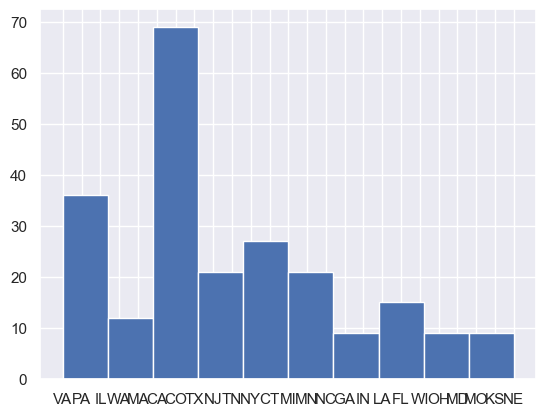

In [10]:
df_clean['location'].hist()

In [11]:
df2=smf.ols('employment_change_rate~location',data=df).fit()
df2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     employment_change_rate   R-squared:                       0.176
Model:                                OLS   Adj. R-squared:                  0.079
Method:                     Least Squares   F-statistic:                     1.808
Date:                    Tue, 28 Nov 2023   Prob (F-statistic):             0.0151
Time:                            20:58:06   Log-Likelihood:                -917.99
No. Observations:                     228   AIC:                             1886.
Df Residuals:                         203   BIC:                             1972.
Df Model:                              24                                         
Covariance Type:                nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          9.4203      2.302      4.093      0.000       4.882      13.958
location[T.CO]    -8.2382      5.315     -1.550      0.123     -18.719       2.242
location[T.CT]   -15.1163      8.612     -1.755      0.081     -32.096       1.864
location[T.FL]    -9.4148      6.303     -1.494      0.137     -21.843       3.013
location[T.GA]    -5.6725      6.303     -0.900      0.369     -18.101       6.756
location[T.IL]    -6.1406      4.367     -1.406      0.161     -14.751       2.470
location[T.IN]     3.9300      8.612      0.456      0.649     -13.050      20.910
location[T.KS]   -10.6457      8.612     -1.236      0.218     -27.626       6.334
location[T.LA]   -17.7772      6.303     -2.820      0.005     -30.205      -5.349
location[T.MA]    -6.7600      5.315     -1.272      0.205     -17.240       3.720
location[T.MD]   -10.9585      6.303     -1.739      0.084     -23.387       1.470
location[T.MI]     4.1065      6.303      0.651      0.515      -8.322      16.535
location[T.MN]    -4.1033      6.303     -0.651      0.516     -16.531       8.325
location[T.MO]    -2.6407      8.612     -0.307      0.759     -19.621      14.339
location[T.NC]    -8.4559      5.315     -1.591      0.113     -18.936       2.024
location[T.NE]   -12.8733      8.612     -1.495      0.137     -29.853       4.107
location[T.NJ]   -10.3816      4.745     -2.188      0.030     -19.737      -1.026
location[T.NY]     1.0676      3.729      0.286      0.775      -6.285       8.420
location[T.OH]    -9.5533      8.612     -1.109      0.269     -26.533       7.427
location[T.PA]   -11.5681      4.367     -2.649      0.009     -20.179      -2.958
location[T.TN]    -9.7687      5.315     -1.838      0.068     -20.249       0.712
location[T.TX]   -12.6793      3.890     -3.259      0.001     -20.350      -5.009
location[T.VA]    -6.6885      6.303     -1.061      0.290     -19.117       5.740
location[T.WA]    18.0373      8.612      2.094      0.037       1.057      35.017
location[T.WI]   -15.1340      8.612     -1.757      0.080     -32.114       1.846
==============================================================================
Omnibus:                      125.514   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1230.918
Skew:                           1.928   Prob(JB):                    5.12e-268
Kurtosis:                      13.710   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
df2=smf.ols('employment_change_rate~company+location+industry+employees_gained+total_equity_mil+total_revenue_mil+total_employees+profit_mil+relocation+mergers_buyouts_acquisitions+year+sector',data=df).fit()
df2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     employment_change_rate   R-squared:                       0.633
Model:                                OLS   Adj. R-squared:                  0.413
Method:                     Least Squares   F-statistic:                     2.880
Date:                    Tue, 28 Nov 2023   Prob (F-statistic):           1.22e-08
Time:                            20:58:06   Log-Likelihood:                -825.84
No. Observations:                     228   AIC:                             1824.
Df Residuals:                         142   BIC:                             2119.
Df Model:                              85                                         
Covariance Type:                nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                  -3147.3583   1788.239     -1.760      0.081   -6682.370     387.653
company[T.AT&T]                                             -120.5558     58.817     -2.050      0.042    -236.827      -4.285
company[T.Alcoa]                                              -9.7391      8.609     -1.131      0.260     -26.757       7.279
company[T.Allstate]                                           31.5172     18.670      1.688      0.094      -5.390      68.424
company[T.Amazon]                                            -50.7077     36.621     -1.385      0.168    -123.101      21.685
company[T.American Tower]                                     -5.2072      5.548     -0.939      0.350     -16.175       5.760
company[T.Amgen]                                             -87.5467     49.058     -1.785      0.076    -184.525       9.432
company[T.Apple]                                             -29.5967     22.220     -1.332      0.185     -73.522      14.328
company[T.Archer Daniels Midland]                            -24.6229     13.797     -1.785      0.076     -51.897       2.651
company[T.Arrow Electronics]                                 -99.5825     57.834     -1.722      0.087    -213.909      14.744
company[T.AutoZone]                                          -15.0022     12.354     -1.214      0.227     -39.425       9.420
company[T.Automatic Data Processing]                         -57.4826     33.534     -1.714      0.089    -123.772       8.807
company[T.BJ's Wholesale Club]                                 1.4966      8.043      0.186      0.853     -14.403      17.396
company[T.Bed Bath & Beyond]                                 -23.3146     12.711     -1.834      0.069     -48.442       1.813
company[T.Blackstone]                                         -5.0954     10.022     -0.508      0.612     -24.907      14.716
company[T.Boeing]                                           -100.8505     59.406     -1.698      0.092    -218.284      16.583
company[T.Booking Holdings]                                  -12.9448      9.854     -1.314      0.191     -32.424       6.534
company[T.BorgWarner]                                        -33.5793     20.701     -1.622      0.107     -74.502       7.343
company[T.C.H. Robinson Worldwide]                           -63.4500     37.303     -1.701      0.091    -137.192      10.292
company[T.CBRE Group]                                        -93.0351     56.138     -1.657      0.100    -204.009      17.939
company[T.Cisco Systems]                                     -62.6139     32.661     -1.917      0.057    -127.178    

In [13]:
df3=smf.ols('employment_change_rate~location+employees_gained+total_equity_mil+total_revenue_mil+total_employees+profit_mil+relocation+mergers_buyouts_acquisitions+year+sector',data=df).fit()
df3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     employment_change_rate   R-squared:                       0.441
Model:                                OLS   Adj. R-squared:                  0.295
Method:                     Least Squares   F-statistic:                     3.020
Date:                    Tue, 28 Nov 2023   Prob (F-statistic):           7.13e-08
Time:                            20:58:06   Log-Likelihood:                -873.79
No. Observations:                     228   AIC:                             1844.
Df Residuals:                         180   BIC:                             2008.
Df Model:                              47                                         
Covariance Type:                nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                               -3612.2808   2089.924     -1.728      0.086   -7736.184     511.622
location[T.CO]                             -7.3491      6.249     -1.176      0.241     -19.680       4.982
location[T.CT]                            -12.1504      7.798     -1.558      0.121     -27.537       3.236
location[T.FL]                             -6.8079      6.210     -1.096      0.274     -19.062       5.446
location[T.GA]                             16.5942     12.982      1.278      0.203      -9.022      42.211
location[T.IL]                              0.6777      5.767      0.118      0.907     -10.702      12.057
location[T.IN]                              3.6790      9.126      0.403      0.687     -14.328      21.686
location[T.KS]                              0.3169     10.071      0.031      0.975     -19.555      20.189
location[T.LA]                             -9.1549      7.461     -1.227      0.221     -23.877       5.567
location[T.MA]                              0.9247      5.967      0.155      0.877     -10.850      12.699
location[T.MD]                              0.0012     11.783      0.000      1.000     -23.249      23.251
location[T.MI]                             -9.6765      7.993     -1.211      0.228     -25.449       6.096
location[T.MN]                             14.6766     12.034      1.220      0.224      -9.070      38.423
location[T.MO]                             -2.8099     10.515     -0.267      0.790     -23.558      17.938
location[T.NC]                              0.4957      5.619      0.088      0.930     -10.592      11.583
location[T.NE]                              8.3002     14.410      0.576      0.565     -20.134      36.734
location[T.NJ]                             -7.4666      4.915     -1.519      0.130     -17.164       2.231
location[T.NY]                              2.7779      4.638      0.599      0.550      -6.374      11.930
location[T.OH]                              4.7389      7.078      0.670      0.504      -9.227      18.705
location[T.PA]                             -6.1744      4.930     -1.252      0.212     -15.903       3.555
location[T.TN]                             -0.5991      5.533     -0.108      0.914     -11.516      10.318
location[T.TX]                             -6.5583      5.187     -1.264      0.208     -16.793       3.677
location[T.VA]                             -2.9086      5.970     -0.487      0.627     -14.688       8.871
location[T.WA]                             26.5506     36.289      0.732      0.465     -45.055      98.157
location[T.WI]                             -4.7026      8.677     -0.542      0.589     -21.825      12.419
sector[T.Busine

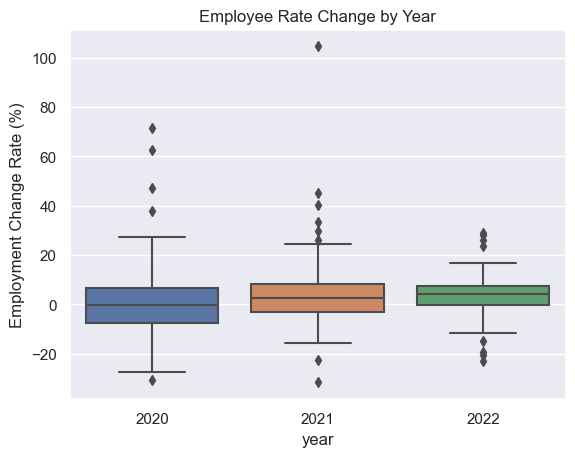

Text(0.5, 0, 'Year')

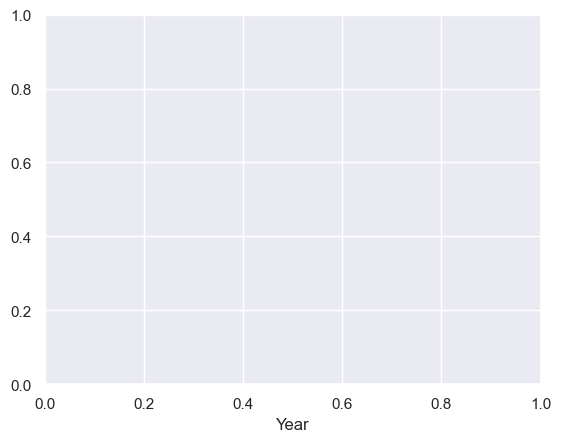

In [14]:
sns.boxplot(x='year', y='employment_change_rate', data=df_clean)
plt.title("Employee Rate Change by Year")
plt.ylabel('Employment Change Rate (%)')
plt.show()
plt.xlabel("Year")

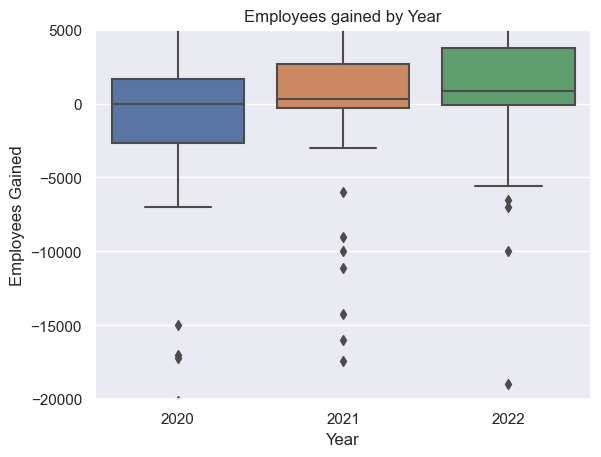

In [15]:
sns.boxplot(x='year', y='employees_gained', data=df_clean)
plt.title("Employees gained by Year")
plt.ylabel('Employees Gained')
plt.ylim(-20000,5000)
plt.xlabel('Year')
plt.show()

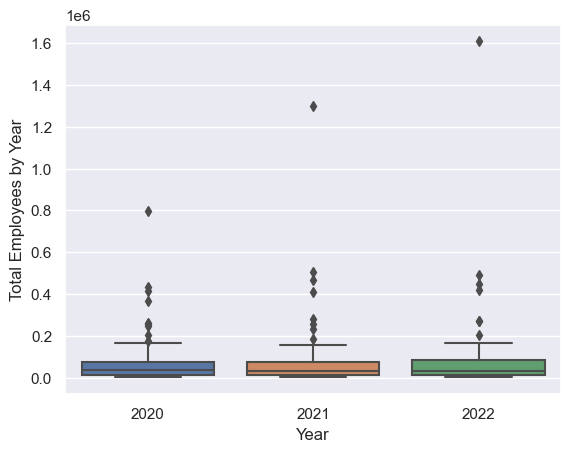

In [16]:
sns.boxplot(x='year', y='total_employees', data=df_clean)
plt.ylabel('Total Employees by Year')
plt.xlabel('Year')
plt.show()

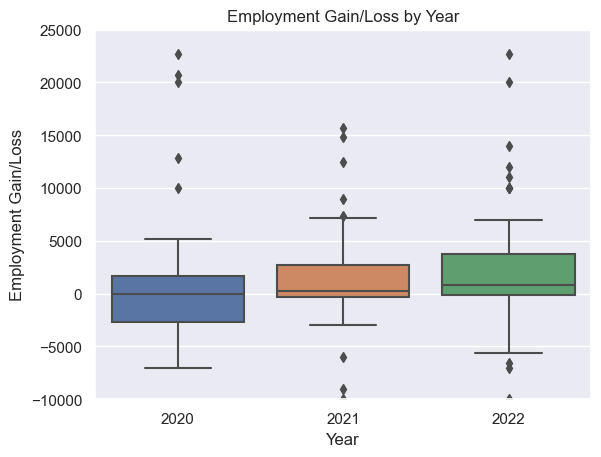

In [17]:
sns.boxplot(x='year', y='employees_gained', data=df_clean)
plt.title("Employment Gain/Loss by Year")
plt.ylim(-10000,25000)
plt.ylabel('Employment Gain/Loss')
plt.xlabel('Year')
plt.show()

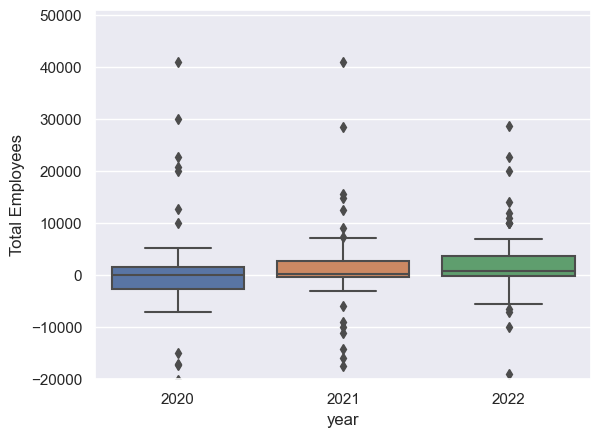

In [18]:
sns.boxplot(x='year', y='employees_gained', data=df_clean)

plt.ylim(-20000,51000)
plt.ylabel('Total Employees')
plt.show()

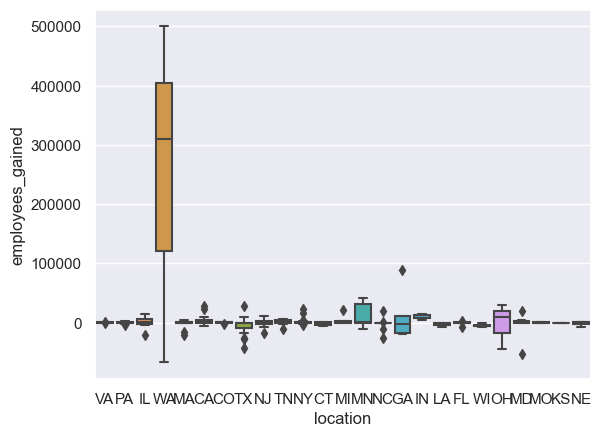

In [19]:
sns.boxplot(x='location', y='employees_gained', data=df_clean)

plt.show()

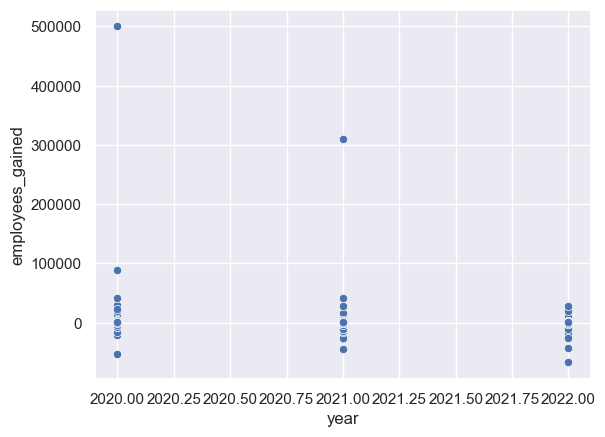

In [20]:
sns.scatterplot(x='year', y='employees_gained', data=df_clean)
plt.show()

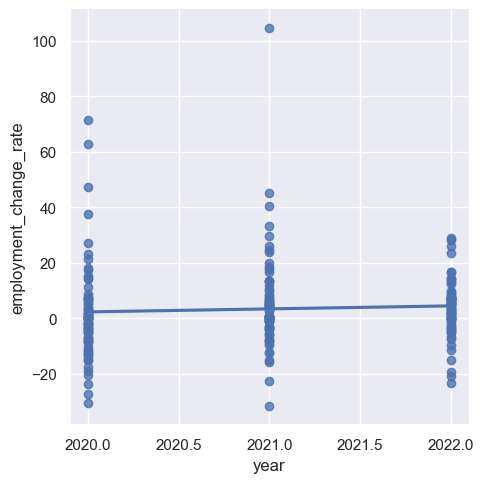

In [21]:
sns.lmplot(x='year', y='employment_change_rate', data=df_clean, ci=False)
plt.show()

In [22]:
df_2020=df_clean[df_clean["year"]==2020]
df_2020

,employment_change_rate,company,location,industry,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year,sector
0,2.025,AES,VA,Utilities: Gas and Electric,162.0,4720.0,10189,8000,303,0,0,2020,Energy
4,-6.522,Alcoa,PA,Metals,-900.0,5016.0,10433,13800,1125,0,0,2020,Materials
8,-8.743,Allstate,IL,Insurance: Property and Casualty (Stock),-4025.0,30217.0,44675,46035,4847,0,1,2020,Financials
12,62.657,Amazon,WA,Internet Services and Retailing,500000.0,93404.0,280522,798000,11588,0,3,2020,Retailing
16,3.007,American Tower,MA,Real Estate,164.0,4568.4,7580,5454,1888,0,1,2020,Financials
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,-11.719,UGI,PA,Energy,-1500.0,4137.0,7320,12800,256,0,0,2020,Energy
288,-17.403,Union Pacific,NE,Railroads,-6523.0,16958.0,21708,37483,5919,0,0,2020,Transportation
292,-15.091,United States Steel,PA,Metals,-4150.0,3786.0,12937,27500,630,0,0,2020,Materials
296,-2.009,Vistra,TX,Energy,-110.0,8361.0,11809,5475,928,0,0,2020,Energy


In [23]:
df_2021=df_clean[df_clean["year"]==2021]
df_2021

,employment_change_rate,company,location,industry,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year,sector
1,3.529,AES,VA,Utilities: Gas and Electric,288.0,4567.0,9660,8162,46,0,3,2021,Energy
5,-5.426,Alcoa,PA,Metals,-700.0,6284.0,9286,12900,170,0,0,2021,Materials
9,29.731,Allstate,IL,Insurance: Property and Casualty (Stock),12490.0,25127.0,44791,42010,5576,0,1,2021,Financials
13,23.883,Amazon,WA,Internet Services and Retailing,310000.0,138245.0,386064,1298000,21331,0,5,2021,Retailing
17,13.528,American Tower,MA,Real Estate,760.0,9069.6,8042,5618,1691,0,1,2021,Financials
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.000,UGI,PA,Energy,0.0,5531.0,6559,11300,532,0,1,2021,Energy
289,3.760,Union Pacific,NE,Railroads,1164.0,14161.0,19533,30960,5349,0,1,2021,Transportation
293,5.096,United States Steel,PA,Metals,1190.0,9010.0,9741,23350,1165,0,0,2021,Materials
297,-5.685,Vistra,TX,Energy,-305.0,8292.0,11443,5365,636,0,1,2021,Energy


In [24]:
df_2022=df_clean[df_clean["year"]==2022]
df_2022

,employment_change_rate,company,location,industry,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year,sector
2,7.692,AES,VA,Utilities: Gas and Electric,650.0,4504.0,11141,8450,409,0,0,2022,Energy
6,7.377,Alcoa,PA,Metals,900.0,6589.0,12152,12200,429,0,0,2022,Materials
10,-0.459,Allstate,IL,Insurance: Property and Casualty (Stock),-250.0,17350.0,53228,54500,1599,0,-1,2022,Financials
14,-4.167,Amazon,WA,Internet Services and Retailing,-67000.0,146043.0,469822,1608000,33364,0,9,2022,Retailing
18,0.204,American Tower,MA,Real Estate,13.0,12408.5,9357,6378,2568,0,0,2022,Financials
...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,-11.504,UGI,PA,Utilities: Gas and Electric,-1300.0,6074.0,7447,11300,1467,0,0,2022,Energy
290,3.284,Union Pacific,NE,Railroads,1055.0,12163.0,21804,32124,6523,0,0,2022,Transportation
294,-7.335,United States Steel,PA,Metals,-1800.0,10218.0,20275,24540,4174,0,0,2022,Materials
298,-2.964,Vistra,TX,Energy,-150.0,4918.0,12077,5060,1274,0,0,2022,Energy


In [25]:
df_clean['sector'].unique()

array(['Energy', 'Materials', 'Financials', 'Retailing', 'Health Care',
       'Technology', 'Food, Beverages & Tobacco', 'Wholesalers',
       'Telecommunications', 'Business Services', 'Aerospace & Defense',
       'Motor Vehicles & Parts', 'Transportation', 'Chemicals',
       'Industrials', 'Food & Drug Stores',
       'Hotels, Restaurants & Leisure'], dtype=object)

In [26]:
df_2020["employees_gained"].mean()

7393.710526315789

In [27]:
df_2021["employees_gained"].mean()

4294.539473684211

In [28]:
df_2022["employees_gained"].mean()

458.2631578947368

In [29]:
df_2020["employees_gained"].median()

-6.5

In [30]:
df_2020["employees_gained"].median()            

-6.5

In [31]:
df_2020["employees_gained"].describe()

count        76.000000
mean       7393.710526
std       59211.038891
min      -53000.000000
25%       -2675.000000
50%          -6.500000
75%        1655.750000
max      500000.000000
Name: employees_gained, dtype: float64

In [32]:
df_clean.describe()

,employment_change_rate,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year
count,228.000000,228.000000,228.000000,228.000000,2.280000e+02,228.000000,228.000000,228.000000,228.000000
mean,3.433947,4048.837719,22458.076807,43903.907895,8.422489e+04,4700.052632,0.008772,1.078947,2021.000000
std,14.974532,40804.143648,46674.790059,66793.964190,1.681578e+05,9928.116974,0.093452,1.962848,0.818293
min,-31.636000,-67000.000000,-18075.000000,5758.000000,1.384000e+03,11.000000,0.000000,-1.000000,2020.000000
25%,-3.621750,-925.000000,2780.500000,10027.250000,1.374000e+04,669.500000,0.000000,0.000000,2020.000000
50%,1.877000,230.000000,6704.500000,16738.500000,3.351100e+04,1578.000000,0.000000,0.000000,2021.000000
75%,7.418500,2652.000000,20267.250000,49430.250000,7.800000e+04,4692.000000,0.000000,1.000000,2022.000000
max,104.548000,500000.000000,294127.000000,469822.000000,1.608000e+06,94680.000000,1.000000,12.000000,2022.000000


In [33]:
df3=smf.ols('employment_change_rate~company+location+industry+employees_gained+total_equity_mil+total_revenue_mil+total_employees+profit_mil+relocation+mergers_buyouts_acquisitions+year+sector',data=df_clean).fit()
df3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     employment_change_rate   R-squared:                       0.633
Model:                                OLS   Adj. R-squared:                  0.413
Method:                     Least Squares   F-statistic:                     2.880
Date:                    Tue, 28 Nov 2023   Prob (F-statistic):           1.22e-08
Time:                            20:58:10   Log-Likelihood:                -825.84
No. Observations:                     228   AIC:                             1824.
Df Residuals:                         142   BIC:                             2119.
Df Model:                              85                                         
Covariance Type:                nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                  -3147.3583   1788.239     -1.760      0.081   -6682.370     387.653
company[T.AT&T]                                             -120.5558     58.817     -2.050      0.042    -236.827      -4.285
company[T.Alcoa]                                              -9.7391      8.609     -1.131      0.260     -26.757       7.279
company[T.Allstate]                                           31.5172     18.670      1.688      0.094      -5.390      68.424
company[T.Amazon]                                            -50.7077     36.621     -1.385      0.168    -123.101      21.685
company[T.American Tower]                                     -5.2072      5.548     -0.939      0.350     -16.175       5.760
company[T.Amgen]                                             -87.5467     49.058     -1.785      0.076    -184.525       9.432
company[T.Apple]                                             -29.5967     22.220     -1.332      0.185     -73.522      14.328
company[T.Archer Daniels Midland]                            -24.6229     13.797     -1.785      0.076     -51.897       2.651
company[T.Arrow Electronics]                                 -99.5825     57.834     -1.722      0.087    -213.909      14.744
company[T.AutoZone]                                          -15.0022     12.354     -1.214      0.227     -39.425       9.420
company[T.Automatic Data Processing]                         -57.4826     33.534     -1.714      0.089    -123.772       8.807
company[T.BJ's Wholesale Club]                                 1.4966      8.043      0.186      0.853     -14.403      17.396
company[T.Bed Bath & Beyond]                                 -23.3146     12.711     -1.834      0.069     -48.442       1.813
company[T.Blackstone]                                         -5.0954     10.022     -0.508      0.612     -24.907      14.716
company[T.Boeing]                                           -100.8505     59.406     -1.698      0.092    -218.284      16.583
company[T.Booking Holdings]                                  -12.9448      9.854     -1.314      0.191     -32.424       6.534
company[T.BorgWarner]                                        -33.5793     20.701     -1.622      0.107     -74.502       7.343
company[T.C.H. Robinson Worldwide]                           -63.4500     37.303     -1.701      0.091    -137.192      10.292
company[T.CBRE Group]                                        -93.0351     56.138     -1.657      0.100    -204.009      17.939
company[T.Cisco Systems]                                     -62.6139     32.661     -1.917      0.057    -127.178    

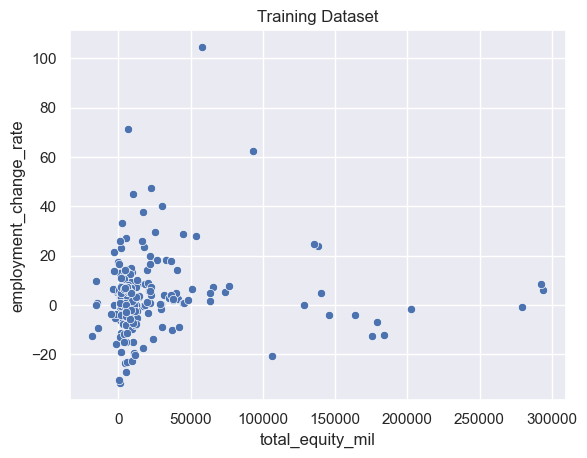

In [34]:
sns.scatterplot(x='total_equity_mil', y='employment_change_rate', data=df_clean)
plt.title('Training Dataset')
plt.show()

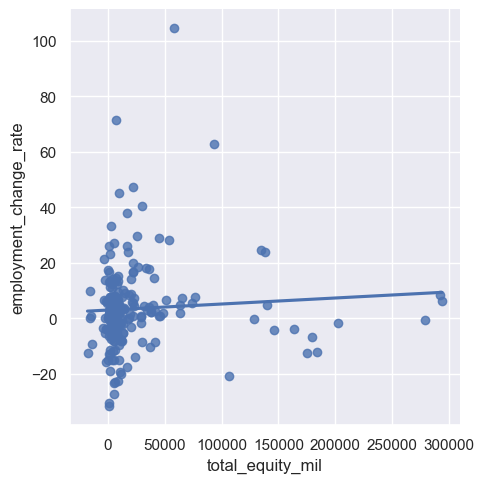

In [35]:
sns.lmplot(x='total_equity_mil', y='employment_change_rate', data=df_clean, ci=None)

plt.show()

In [36]:
df_clean.corr()

,employment_change_rate,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year
employment_change_rate,1.000000,0.405283,0.067458,0.024879,0.046134,0.017269,0.084684,0.246613,0.059036
employees_gained,0.405283,1.000000,0.146054,0.314641,0.413841,0.098862,0.029421,0.122623,-0.069542
total_equity_mil,0.067458,0.146054,1.000000,0.587351,0.333039,0.545167,0.009238,0.181236,0.011261
total_revenue_mil,0.024879,0.314641,0.587351,1.000000,0.759948,0.740371,-0.007170,0.243906,0.050255
total_employees,0.046134,0.413841,0.333039,0.759948,1.000000,0.366686,0.008645,0.228496,0.028439
profit_mil,0.017269,0.098862,0.545167,0.740371,0.366686,1.000000,-0.014857,0.286432,0.084128
relocation,0.084684,0.029421,0.009238,-0.007170,0.008645,-0.014857,1.000000,0.044240,0.057607
mergers_buyouts_acquisitions,0.246613,0.122623,0.181236,0.243906,0.228496,0.286432,0.044240,1.000000,0.038398
year,0.059036,-0.069542,0.011261,0.050255,0.028439,0.084128,0.057607,0.038398,1.000000


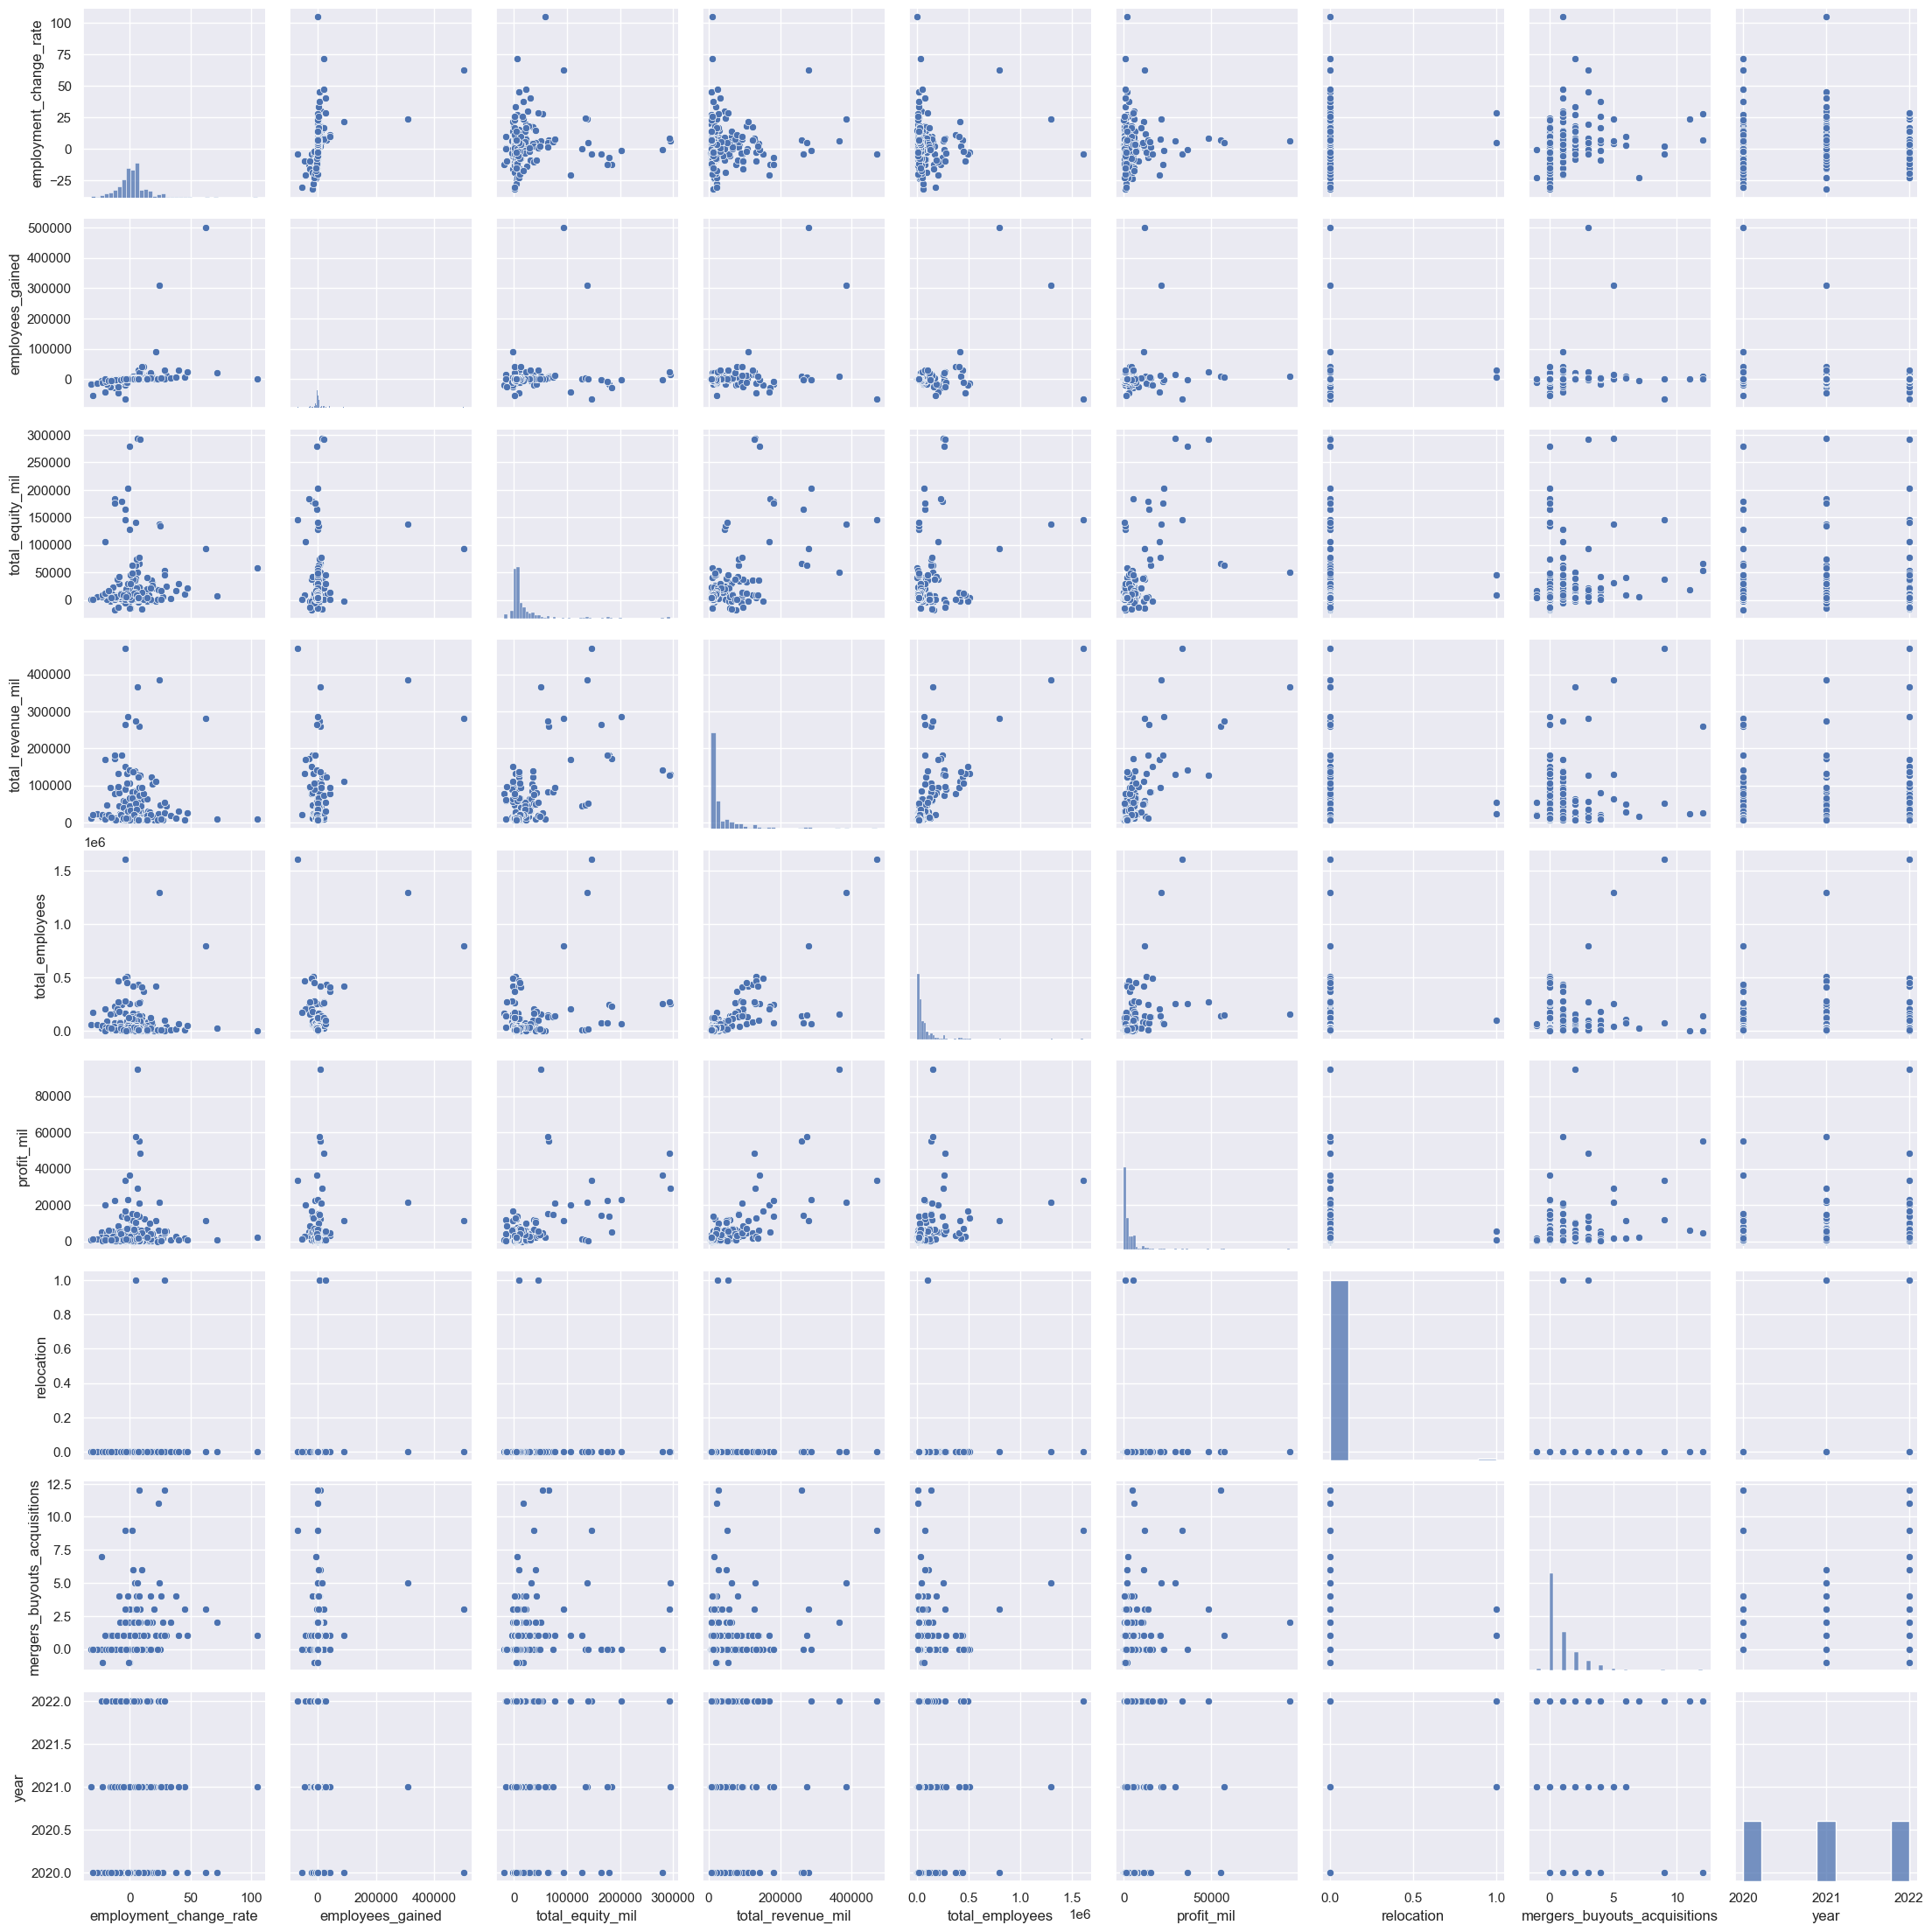

In [37]:
sns.pairplot(df_clean)
plt.show()

In [38]:
df_2020["employment_change_rate"].mean()

1.4802105263157899

In [39]:
df_2021["employment_change_rate"].mean()

5.18075

In [40]:
df_2022["employment_change_rate"].mean()

3.640881578947369

In [41]:
df_clean["industry"].unique()

array(['Utilities: Gas and Electric', 'Metals',
       'Insurance: Property and Casualty (Stock)',
       'Internet Services and Retailing', 'Real Estate',
       'Pharmaceuticals', 'Computers, Office Equipment',
       'Food Production', 'Wholesalers: Electronics and Office Equipment',
       'Telecommunications', 'Diversified Outsourcing Services',
       'Specialty Retailers: Other', 'General Merchandisers',
       'Diversified Financials', 'Aerospace & Defense',
       'Motor Vehicles & Parts', 'Transportation and Logistics',
       'Network and Other Communications Equipment', 'Beverages',
       'Health Care: Medical Facilities', 'Petroleum Refining',
       'Airlines', 'Chemicals', 'Health Care: Insurance and Managed Care',
       'Insurance: Property and Casualty (Mutual)',
       'Specialty Retailers: Apparel', 'Industrial Machinery',
       'Oil and Gas Equipment, Services', 'Packaging, Containers',
       'Advertising, Marketing', 'Computer Software',
       'Construction an

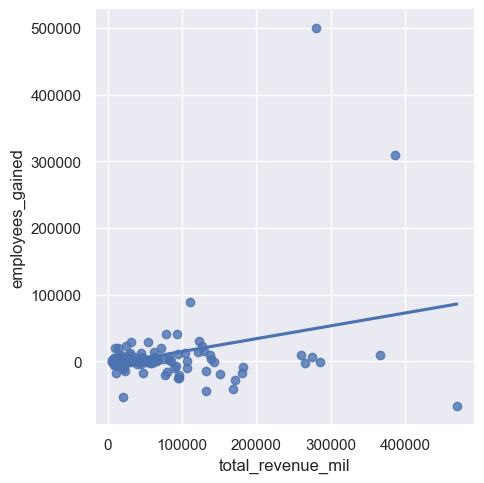

In [42]:
sns.lmplot(x='total_revenue_mil', y='employees_gained', data=df_clean, ci=None)

plt.show()

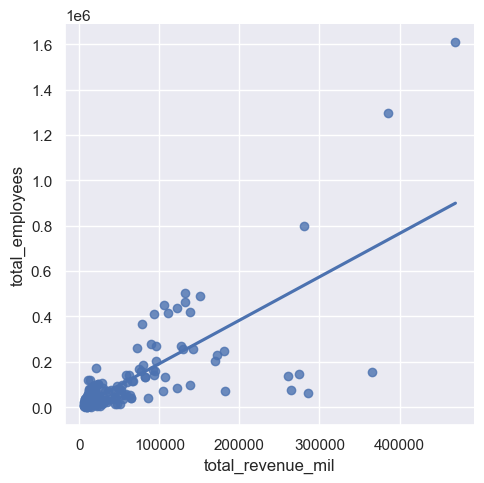

In [43]:
sns.lmplot(x='total_revenue_mil', y='total_employees', data=df_clean, ci=None)

plt.show()

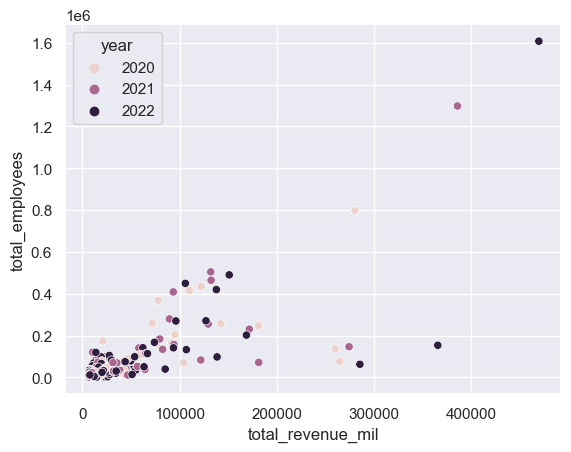

In [44]:
sns.scatterplot(x='total_revenue_mil', y='total_employees', hue='year', data=df_clean)
plt.show()

In [45]:
df_anti_amazon=df_clean[df_clean['company']!="BorgWarner"]
df_anti_amazon

,employment_change_rate,company,location,industry,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year,sector
0,2.025,AES,VA,Utilities: Gas and Electric,162.0,4720.0,10189,8000,303,0,0,2020,Energy
1,3.529,AES,VA,Utilities: Gas and Electric,288.0,4567.0,9660,8162,46,0,3,2021,Energy
2,7.692,AES,VA,Utilities: Gas and Electric,650.0,4504.0,11141,8450,409,0,0,2022,Energy
4,-6.522,Alcoa,PA,Metals,-900.0,5016.0,10433,13800,1125,0,0,2020,Materials
5,-5.426,Alcoa,PA,Metals,-700.0,6284.0,9286,12900,170,0,0,2021,Materials
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,-5.685,Vistra,TX,Energy,-305.0,8292.0,11443,5365,636,0,1,2021,Energy
298,-2.964,Vistra,TX,Energy,-150.0,4918.0,12077,5060,1274,0,0,2022,Energy
300,6.604,Zoetis,NJ,Pharmaceuticals,700.0,3773.0,6260,10600,1500,0,2,2020,Health Care
301,7.080,Zoetis,NJ,Pharmaceuticals,800.0,4544.0,6675,11300,1638,0,2,2021,Health Care


In [46]:
df_anti_amazon['employment_change_rate'].mean()

3.1354177777777776

In [47]:
df_clean['employment_change_rate'].mean()

3.433947368421052

In [48]:
df_sector_counts = df_clean['sector'].value_counts()
df_sector_counts

Financials                       36
Technology                       33
Energy                           30
Retailing                        30
Health Care                      18
Materials                        12
Transportation                    9
Food, Beverages & Tobacco         9
Business Services                 9
Chemicals                         9
Industrials                       6
Telecommunications                6
Motor Vehicles & Parts            6
Aerospace & Defense               6
Wholesalers                       3
Food & Drug Stores                3
Hotels, Restaurants & Leisure     3
Name: sector, dtype: int64

In [49]:
df_sector_percentage=df_clean['sector'].value_counts(normalize=True)
df_sector_percentage

Financials                       0.157895
Technology                       0.144737
Energy                           0.131579
Retailing                        0.131579
Health Care                      0.078947
Materials                        0.052632
Transportation                   0.039474
Food, Beverages & Tobacco        0.039474
Business Services                0.039474
Chemicals                        0.039474
Industrials                      0.026316
Telecommunications               0.026316
Motor Vehicles & Parts           0.026316
Aerospace & Defense              0.026316
Wholesalers                      0.013158
Food & Drug Stores               0.013158
Hotels, Restaurants & Leisure    0.013158
Name: sector, dtype: float64

In [50]:
df_chemicals=df_clean[df_clean['sector']=="Energy"]
df_chemicals

,employment_change_rate,company,location,industry,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year,sector
0,2.025,AES,VA,Utilities: Gas and Electric,162.0,4720.000,10189,8000,303,0,0,2020,Energy
1,3.529,AES,VA,Utilities: Gas and Electric,288.0,4567.000,9660,8162,46,0,3,2021,Energy
2,7.692,AES,VA,Utilities: Gas and Electric,650.0,4504.000,11141,8450,409,0,0,2022,Energy
96,-4.721,Delek US Holdings,TN,Petroleum Refining,-175.0,1125.100,9298,3707,311,0,0,2020,Energy
97,-6.229,Delek US Holdings,TN,Petroleum Refining,-220.0,1014.000,7302,3532,608,0,0,2021,Energy
98,13.104,Delek US Holdings,TN,Petroleum Refining,434.0,1069.500,10648,3312,204,0,0,2022,Energy
120,-1.724,Entergy,LA,Utilities: Gas and Electric,-235.0,10961.142,10879,13635,1241,0,0,2020,Energy
121,-7.694,Entergy,LA,Utilities: Gas and Electric,-1031.0,11705.394,10114,13400,1388,0,0,2021,Energy
122,-5.352,Entergy,LA,Utilities: Gas and Electric,-662.0,13064.892,11743,12369,1119,0,0,2022,Energy
128,-3.872,Exxon Mobil,TX,Petroleum Refining,-2900.0,164130.000,264938,74900,14340,0,0,2020,Energy


In [51]:
df_chemicals['employment_change_rate'].mean()

-2.763966666666667

In [52]:
df['sector'].value_counts(normalize=True)

Financials                       0.157895
Technology                       0.144737
Energy                           0.131579
Retailing                        0.131579
Health Care                      0.078947
Materials                        0.052632
Transportation                   0.039474
Food, Beverages & Tobacco        0.039474
Business Services                0.039474
Chemicals                        0.039474
Industrials                      0.026316
Telecommunications               0.026316
Motor Vehicles & Parts           0.026316
Aerospace & Defense              0.026316
Wholesalers                      0.013158
Food & Drug Stores               0.013158
Hotels, Restaurants & Leisure    0.013158
Name: sector, dtype: float64

In [53]:
df['sector'].value_counts()

Financials                       36
Technology                       33
Energy                           30
Retailing                        30
Health Care                      18
Materials                        12
Transportation                    9
Food, Beverages & Tobacco         9
Business Services                 9
Chemicals                         9
Industrials                       6
Telecommunications                6
Motor Vehicles & Parts            6
Aerospace & Defense               6
Wholesalers                       3
Food & Drug Stores                3
Hotels, Restaurants & Leisure     3
Name: sector, dtype: int64

Text(0.5, 0, 'Average Employment Change Rate by Industry Sector')

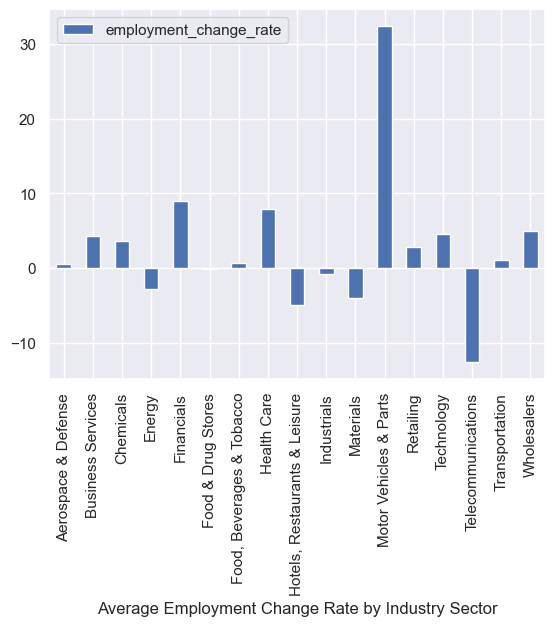

In [54]:
df_clean[[ 'employment_change_rate','sector']].groupby(['sector']).mean().plot.bar()
plt.xlabel("Average Employment Change Rate by Industry Sector")

In [55]:
df_clean[['sector', 'employment_change_rate']].groupby(['sector']).mean()


,employment_change_rate
sector,
Aerospace & Defense,0.580167
Business Services,4.392111
Chemicals,3.683556
Energy,-2.763967
Financials,9.038778
Food & Drug Stores,-0.133000
"Food, Beverages & Tobacco",0.770444
Health Care,7.955222
"Hotels, Restaurants & Leisure",-4.873000


Text(0.5, 1.0, 'Average Employment Change Rate by Industry Sector')

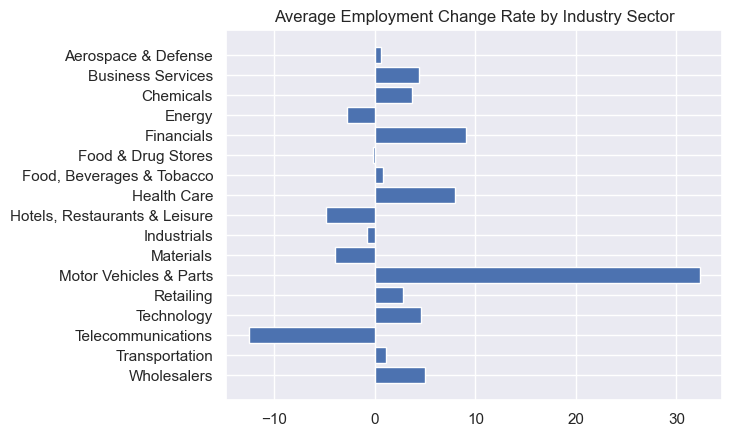

In [56]:
import numpy as np

sector=('Aerospace & Defense','Business Services','Chemicals','Energy','Financials','Food & Drug Stores', 'Food, Beverages & Tobacco','Health Care','Hotels, Restaurants & Leisure','Industrials','Materials','Motor Vehicles & Parts','Retailing','Technology','Telecommunications','Transportation','Wholesalers')
sector=list(reversed(sector))
rate=[0.580167,4.392111,3.683556,-2.763967,9.038778,-0.133000,0.770444,7.955222,-4.873000,-0.742500,-3.970417,32.321000,2.841233,4.606848,-12.522000,1.148778,4.965000]
rate.reverse()
y_pos=np.arange(len(sector))
plt.barh(y_pos,rate)
plt.yticks(y_pos,sector)
plt.title("Average Employment Change Rate by Industry Sector")

Text(0.5, 0, 'Average Employment Change Rate by Industry Sector in 2020')

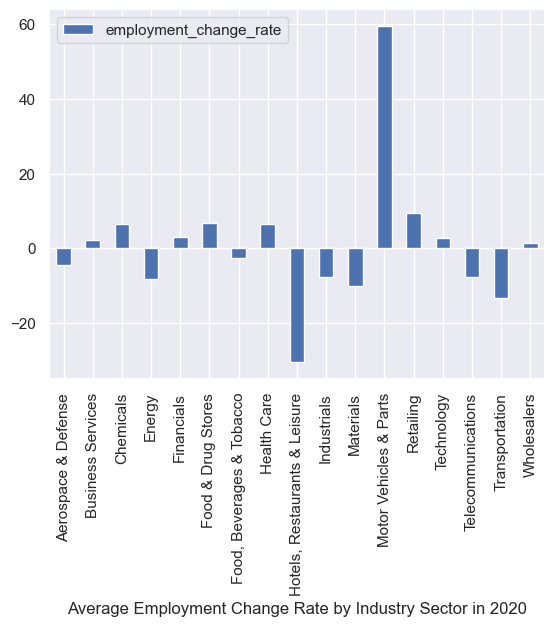

In [57]:
df_2020[['sector', 'employment_change_rate']].groupby(['sector']).mean().plot.bar()
plt.xlabel("Average Employment Change Rate by Industry Sector in 2020")


In [58]:
df_2020[['sector', 'employment_change_rate']].groupby(['sector']).mean()

,employment_change_rate
sector,
Aerospace & Defense,-4.420500
Business Services,2.224333
Chemicals,6.471333
Energy,-8.270400
Financials,2.941917
Food & Drug Stores,6.897000
"Food, Beverages & Tobacco",-2.518000
Health Care,6.399500
"Hotels, Restaurants & Leisure",-30.460000


Text(0.5, 1.0, 'Average Employment Change Rate by Industry Sector in 2020')

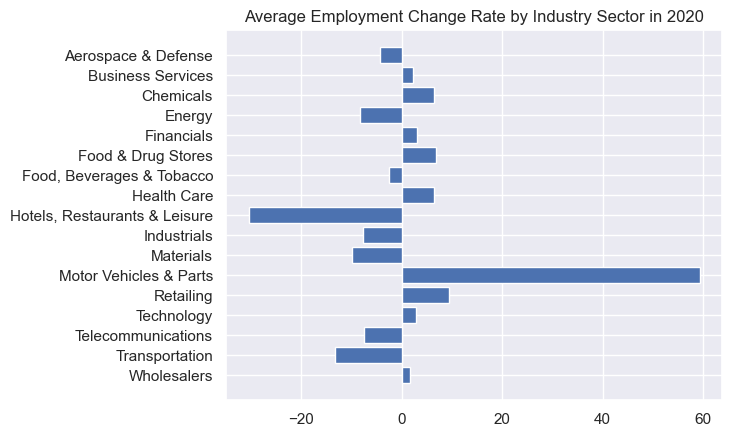

In [59]:
sector=('Aerospace & Defense','Business Services','Chemicals','Energy','Financials','Food & Drug Stores', 'Food, Beverages & Tobacco','Health Care','Hotels, Restaurants & Leisure','Industrials','Materials','Motor Vehicles & Parts','Retailing','Technology','Telecommunications','Transportation','Wholesalers')
sector=list(reversed(sector))
rate=[-4.420500,2.224333,6.471333,-8.270400,2.941917,6.897000,-2.518000,6.399500,-30.460000,-7.745000,-9.994750,59.370000,9.423800,2.836182,-7.556000,-13.259333,1.554000]
rate.reverse()
y_pos=np.arange(len(sector))
plt.barh(y_pos,rate)
plt.yticks(y_pos,sector)
plt.title("Average Employment Change Rate by Industry Sector in 2020")

Text(0.5, 0, 'Average Employment Change Rate by Industry Sector in 2021')

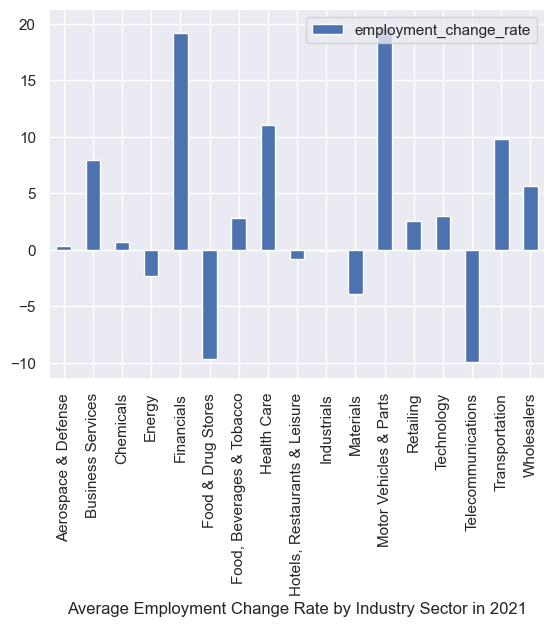

In [60]:
df_2021[['sector', 'employment_change_rate']].groupby(['sector']).mean().plot.bar()
plt.xlabel("Average Employment Change Rate by Industry Sector in 2021")


In [61]:
df_2021[['sector', 'employment_change_rate']].groupby(['sector']).mean()

,employment_change_rate
sector,
Aerospace & Defense,0.354500
Business Services,7.971000
Chemicals,0.664000
Energy,-2.294600
Financials,19.130917
Food & Drug Stores,-9.677000
"Food, Beverages & Tobacco",2.797667
Health Care,11.014167
"Hotels, Restaurants & Leisure",-0.826000


Text(0.5, 1.0, 'Average Employment Change Rate by Industry Sector in 2021')

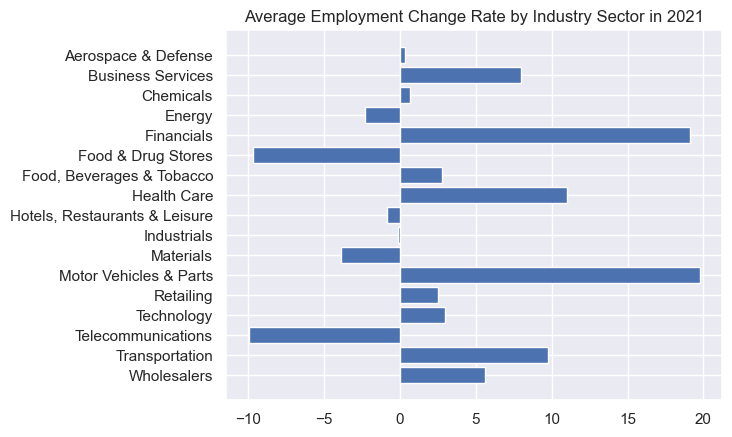

In [62]:
sector=('Aerospace & Defense','Business Services','Chemicals','Energy','Financials','Food & Drug Stores', 'Food, Beverages & Tobacco','Health Care','Hotels, Restaurants & Leisure','Industrials','Materials','Motor Vehicles & Parts','Retailing','Technology','Telecommunications','Transportation','Wholesalers')
sector=list(reversed(sector))
rate=[0.354500,7.971000,0.664000,-2.294600,19.130917,-9.677000,2.797667,11.014167,-0.826000,-0.100000,-3.884250,19.760000,2.532800,2.946636,-9.947500,9.760667,5.612000]
rate.reverse()
y_pos=np.arange(len(sector))
plt.barh(y_pos,rate)
plt.yticks(y_pos,sector)
plt.title("Average Employment Change Rate by Industry Sector in 2021")

Text(0.5, 0, 'Average Employment Change Rate by Industry Sector in 2022')

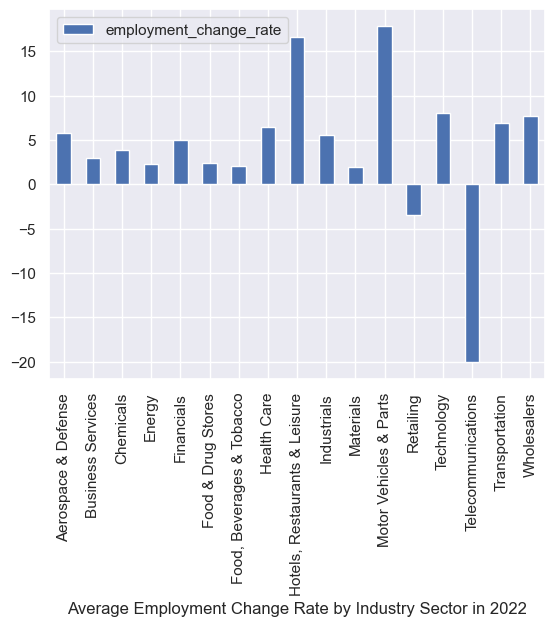

In [63]:
df_2022[['sector', 'employment_change_rate']].groupby(['sector']).mean().plot.bar()
plt.xlabel("Average Employment Change Rate by Industry Sector in 2022")


In [64]:
df_2022[['sector', 'employment_change_rate']].groupby(['sector']).mean()

,employment_change_rate
sector,
Aerospace & Defense,5.806500
Business Services,2.981000
Chemicals,3.915333
Energy,2.273100
Financials,5.043500
Food & Drug Stores,2.381000
"Food, Beverages & Tobacco",2.031667
Health Care,6.452000
"Hotels, Restaurants & Leisure",16.667000


Text(0.5, 1.0, 'Average Employment Change Rate by Industry Sector in 2022')

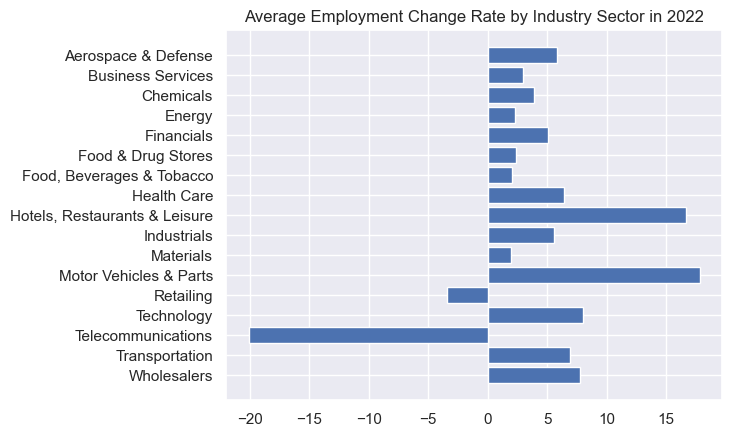

In [65]:
sector=('Aerospace & Defense','Business Services','Chemicals','Energy','Financials','Food & Drug Stores', 'Food, Beverages & Tobacco','Health Care','Hotels, Restaurants & Leisure','Industrials','Materials','Motor Vehicles & Parts','Retailing','Technology','Telecommunications','Transportation','Wholesalers')
sector=list(reversed(sector))
rate=[5.806500,2.981000,3.915333,2.273100,5.043500,2.381000,2.031667,6.452000,16.667000,5.617500,1.967750,17.833000,-3.432900,8.037727,-20.062500,6.945000,7.729000]
rate.reverse()
y_pos=np.arange(len(sector))
plt.barh(y_pos,rate)
plt.yticks(y_pos,sector)
plt.title("Average Employment Change Rate by Industry Sector in 2022")

In [66]:
df_clean.corr()

,employment_change_rate,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year
employment_change_rate,1.000000,0.405283,0.067458,0.024879,0.046134,0.017269,0.084684,0.246613,0.059036
employees_gained,0.405283,1.000000,0.146054,0.314641,0.413841,0.098862,0.029421,0.122623,-0.069542
total_equity_mil,0.067458,0.146054,1.000000,0.587351,0.333039,0.545167,0.009238,0.181236,0.011261
total_revenue_mil,0.024879,0.314641,0.587351,1.000000,0.759948,0.740371,-0.007170,0.243906,0.050255
total_employees,0.046134,0.413841,0.333039,0.759948,1.000000,0.366686,0.008645,0.228496,0.028439
profit_mil,0.017269,0.098862,0.545167,0.740371,0.366686,1.000000,-0.014857,0.286432,0.084128
relocation,0.084684,0.029421,0.009238,-0.007170,0.008645,-0.014857,1.000000,0.044240,0.057607
mergers_buyouts_acquisitions,0.246613,0.122623,0.181236,0.243906,0.228496,0.286432,0.044240,1.000000,0.038398
year,0.059036,-0.069542,0.011261,0.050255,0.028439,0.084128,0.057607,0.038398,1.000000


In [106]:
df_coef=pd.read_csv('coef.csv')
df_coef

,employment_change_rate,location,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year,sector
0,2.025,VA,162.0,4720.0,10189,8000,303,0,0,2020,Energy
1,3.529,VA,288.0,4567.0,9660,8162,46,0,3,2021,Energy
2,7.692,VA,650.0,4504.0,11141,8450,409,0,0,2022,Energy
3,0.000,VA,NaN,NaN,12617,9100,546,0,-1,2023,Energy
4,-6.522,PA,-900.0,5016.0,10433,13800,1125,0,0,2020,Materials
...,...,...,...,...,...,...,...,...,...,...,...
299,0.000,TX,NaN,NaN,13728,4910,1227,0,1,2023,Energy
300,6.604,NJ,700.0,3773.0,6260,10600,1500,0,2,2020,Health Care
301,7.080,NJ,800.0,4544.0,6675,11300,1638,0,2,2021,Health Care
302,14.050,NJ,1700.0,4403.0,7776,12100,2037,0,2,2022,Health Care


In [115]:
df_coef.columns

Index(['employment_change_rate', 'location', 'employees_gained',
       'total_equity_mil', 'total_revenue_mil', 'total_employees',
       'profit_mil', 'relocation', 'mergers_buyouts_acquisitions', 'year',
       'sector'],
      dtype='object')

In [108]:
formula = 'employment_change_rate ~ %s'%(" + ".join(df_coef.columns.values[1:]))
formula

'employment_change_rate ~ location + employees_gained + total_equity_mil + total_revenue_mil + total_employees + profit_mil + relocation + mergers_buyouts_acquisitions + year + sector'

In [109]:
lin_reg = smf.ols(formula, data=df_coef).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     employment_change_rate   R-squared:                       0.441
Model:                                OLS   Adj. R-squared:                  0.295
Method:                     Least Squares   F-statistic:                     3.020
Date:                    Tue, 28 Nov 2023   Prob (F-statistic):           7.13e-08
Time:                            21:17:19   Log-Likelihood:                -873.79
No. Observations:                     228   AIC:                             1844.
Df Residuals:                         180   BIC:                             2008.
Df Model:                              47                                         
Covariance Type:                nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                               -3470.4903   2008.226     -1.728      0.086   -7433.184     492.204
location[T.CA]                           -141.7904     81.810     -1.733      0.085    -303.220      19.639
location[T.CO]                           -149.1396     82.086     -1.817      0.071    -311.114      12.835
location[T.CT]                           -153.9408     82.250     -1.872      0.063    -316.238       8.357
location[T.FL]                           -148.5983     82.090     -1.810      0.072    -310.580      13.384
location[T.GA]                           -125.1962     82.744     -1.513      0.132    -288.469      38.077
location[T.IL]                           -141.1128     82.030     -1.720      0.087    -302.978      20.752
location[T.IN]                           -138.1114     82.403     -1.676      0.095    -300.711      24.489
location[T.KS]                           -141.4735     82.394     -1.717      0.088    -304.057      21.110
location[T.LA]                           -150.9454     82.220     -1.836      0.068    -313.184      11.293
location[T.MA]                           -140.8657     82.035     -1.717      0.088    -302.739      21.007
location[T.MD]                           -141.7892     82.605     -1.716      0.088    -304.788      21.210
location[T.MI]                           -151.4669     82.256     -1.841      0.067    -313.776      10.843
location[T.MN]                           -127.1138     82.686     -1.537      0.126    -290.273      36.045
location[T.MO]                           -144.6003     82.486     -1.753      0.081    -307.364      18.163
location[T.NC]                           -141.2948     82.012     -1.723      0.087    -303.123      20.534
location[T.NE]                           -133.4902     82.953     -1.609      0.109    -297.176      30.195
location[T.NJ]                           -149.2571     81.931     -1.822      0.070    -310.926      12.412
location[T.NY]                           -139.0126     81.966     -1.696      0.092    -300.751      22.726
location[T.OH]                            -66.1563     41.535     -1.593      0.113    -148.114      15.801
location[T.PA]                           -147.9648     81.988     -1.805      0.073    -309.746      13.816
location[T.TN]                           -142.3895     82.021     -1.736      0.084    -304.236      19.457
location[T.TX]                           -148.3487     82.128     -1.806      0.073    -310.407      13.709
location[T.VA]                           -144.6991     82.116     -1.762      0.080    -306.732      17.334
location[T.WA]                           -115.2398     90.069     -1.279      0.202    -292.966      62.487
location[T.WI] 

In [110]:
lin_reg.params

Intercept                                 -3470.490292
location[T.CA]                             -141.790433
location[T.CO]                             -149.139559
location[T.CT]                             -153.940794
location[T.FL]                             -148.598344
location[T.GA]                             -125.196246
location[T.IL]                             -141.112770
location[T.IN]                             -138.111398
location[T.KS]                             -141.473506
location[T.LA]                             -150.945353
location[T.MA]                             -140.865740
location[T.MD]                             -141.789223
location[T.MI]                             -151.466929
location[T.MN]                             -127.113784
location[T.MO]                             -144.600296
location[T.NC]                             -141.294752
location[T.NE]                             -133.490241
location[T.NJ]                             -149.257050
location[T

In [111]:
lin_reg.conf_int()

,0,1
Intercept,-7433.184485,492.203901
location[T.CA],-303.219959,19.639093
location[T.CO],-311.114032,12.834914
location[T.CT],-316.238357,8.356769
location[T.FL],-310.580283,13.383596
location[T.GA],-288.469450,38.076957
location[T.IL],-302.977838,20.752298
location[T.IN],-300.711480,24.488684
location[T.KS],-304.056714,21.109702
location[T.LA],-313.184180,11.293474


In [112]:
err_series = lin_reg.params - lin_reg.conf_int()[0]
err_series

Intercept                                  3962.694193
location[T.CA]                              161.429526
location[T.CO]                              161.974473
location[T.CT]                              162.297563
location[T.FL]                              161.981939
location[T.GA]                              163.273203
location[T.IL]                              161.865068
location[T.IN]                              162.600082
location[T.KS]                              162.583208
location[T.LA]                              162.238827
location[T.MA]                              161.873087
location[T.MD]                              162.998921
location[T.MI]                              162.309483
location[T.MN]                              163.159085
location[T.MO]                              162.763412
location[T.NC]                              161.828589
location[T.NE]                              163.685292
location[T.NJ]                              161.669420
location[T

In [113]:
coef_df = pd.DataFrame({'coef': lin_reg.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
coef_df

,coef,err,varname
0,-141.790433,161.429526,location[T.CA]
1,-149.139559,161.974473,location[T.CO]
2,-153.940794,162.297563,location[T.CT]
3,-148.598344,161.981939,location[T.FL]
4,-125.196246,163.273203,location[T.GA]
5,-141.112770,161.865068,location[T.IL]
6,-138.111398,162.600082,location[T.IN]
7,-141.473506,162.583208,location[T.KS]
8,-150.945353,162.238827,location[T.LA]
9,-140.865740,161.873087,location[T.MA]


C:\Users\fungm\AppData\Local\Temp\ipykernel_14440\2849326949.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


ValueError: The number of FixedLocator locations (49), usually from a call to set_ticks, does not match the number of ticklabels (10).

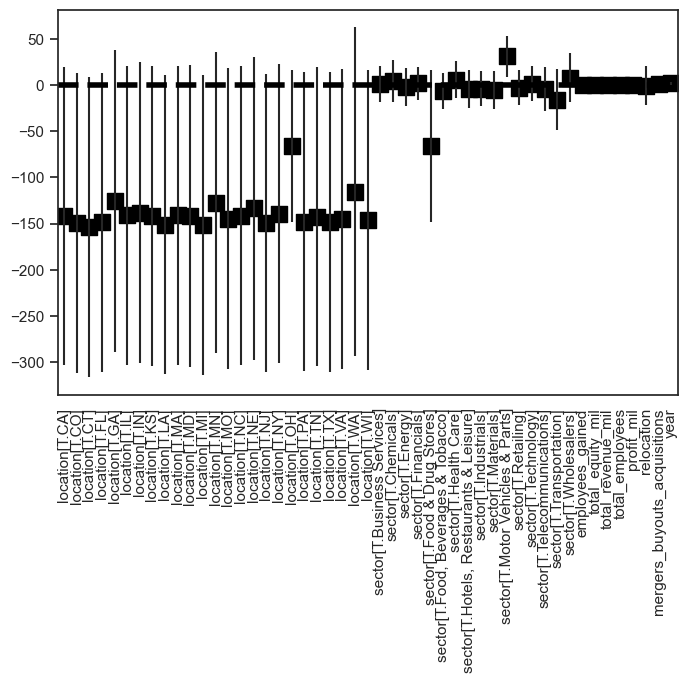

In [116]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['location', 'employees_gained',
       'total_equity_mil', 'total_revenue_mil', 'total_employees',
       'profit_mil', 'relocation', 'mergers_buyouts_acquisitions', 'year',
       'sector'], 
                       rotation=0, fontsize=16)